In [1]:
from sandpile import *
import multiprocessing as mp
from pathlib import Path

## 2D grid comparisons

In [ ]:
params = [
    (20, "open", "conservative"),
    (20, "open", "non conservative"),
    (20, "closed", "conservative"),
    (20, "closed", "non conservative"),
    (5, "open", "conservative"),
    (10, "open", "conservative"),
    (40, "open", "conservative"),
    (5, "closed", "non conservative"),
    (10, "closed", "non conservative"),
    (40, "closed", "non conservative"),
    (5, "open", "non conservative"),
    (10, "open", "non conservative"),
    (40, "open", "non conservative"),
]

data_dir = Path("./data/comparison_2d")
data_dir.mkdir(exist_ok=True)

def worker(func, args):
    return func(*args)


for grid, b, p in params:
    system = SandpileND(2, grid, 7, b, p) # type: ignore
    system.run_multiple_samples(data_dir.absolute().__str__(), 1_000_000, 50, step=50, clear=True, desc=f"{grid} {b}, {p}")
    



d2_g20_c7_op_co:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g20_c7_op_nco:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g20_c7_cl_co:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g20_c7_cl_nco:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g5_c7_op_co:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g10_c7_op_co:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g40_c7_op_co:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g5_c7_cl_nco:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g10_c7_cl_nco:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g40_c7_cl_nco:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g5_c7_op_nco:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g10_c7_op_nco:   0%|          | 0/50 [00:00<?, ?it/s]

d2_g40_c7_op_nco:   0%|          | 0/50 [00:00<?, ?it/s]

# ND closed conservative simulations
    

In [3]:
def worker(func, args):
    return func(*args)


params = [
    # (1, 20),
    (2, 40),
    (3, 20),
    # (4, 15),
    # (5, 15),
    # (6, 10)
]

for dim, grid in params:
    system = SandpileND(dim, grid, 7, "closed", "non conservative")
    x = system.run_multiple_samples("./data", 100_000, 200, step=250, desc=f"dim {dim}, grid {grid}",
                                    clear=True)


d2_g40_c7_cl_nco:   0%|          | 0/200 [00:00<?, ?it/s]

d3_g20_c7_cl_nco:   0%|          | 0/200 [00:00<?, ?it/s]

# Visualisation

FileNotFoundError: [Errno 2] No such file or directory: '/home/gabriel/Documents/Uni/Sandpiles/Code/data/d2_g40_c7_cl_nco/data_5.slopes.npy'

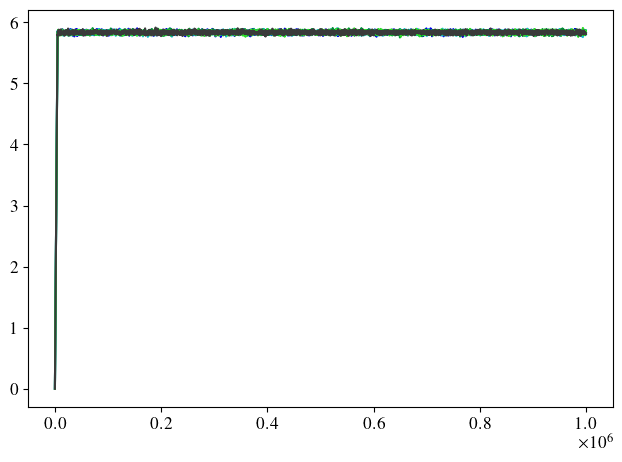

In [3]:

from analysis import *


dim, grid = 2, 40

plt.figure("visualisation")
for i in range(10):
    data_dir = pathlib.Path(f"./data/d{dim}_g{grid}_c7_cl_nco/data_{i}.slopes.npy").resolve().absolute()

    step, slope = load_slope_values(data_dir.__str__())
    draw_slope(slope, step)

